In [148]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K

# Creating training dataset and testing dataset
each dataset contains an input dataset and an output dataset <br/>
input dataset is an (1000, 16)-shaped array  <br/>
output dataset is an (1000, 9)-shaped array  <br/>

In [212]:
def create_binary_dataset():
    input1 = np.random.randint(2, size=(1000,8)) 
    input2 = np.random.randint(2, size=(1000,8))
    #convert input dataset from binary list to decimal
    a = input1 @ (1 << np.arange(input1.shape[1] - 1, -1, -1))
    b = input2 @ (1 << np.arange(input2.shape[1] - 1, -1, -1))
    input_set = np.hstack((input1, input2))
    #calculate ouptut dataset in decimal
    decimal_set = a + b
    #covert output dataset from decimal to binary list
    output_set = list()
    for decimal in decimal_set:
        m =  [int(i) for i in list('{0:b}'.format(decimal))]
        if len(m) == 1:
            m = [0,0,0,0,0,0,0,0] + m
        elif len(m) == 2: 
            m = [0,0,0,0,0,0,0] + m
        elif len(m) == 3:
            m = [0,0,0,0,0,0] + m
        elif len(m) == 4:
            m = [0,0,0,0,0] + m
        elif len(m) == 5:
            m = [0,0,0,0] + m
        elif len(m) == 6:
            m = [0,0,0] + m
        elif len(m) == 7:
            m = [0,0] + m
        elif len(m) == 8:
            m = [0] + m
        else:
            m = m
        output_set.append(m)
    return input_set, np.array(output_set)

input_training_set, output_training_set = create_binary_dataset()
input_testing_set, output_testing_set = create_binary_dataset()

# Creating model
The model has 4 layers  <br/>
input layer has 16 units  <br/>
2 hidden layers, each has 12 units  <br/>
output layer has 9 units 

In [213]:
model = Sequential()
model.add(Dense(units=12, activation = 'relu', input_dim=16, kernel_initializer='uniform'))
model.add(Dense(units=12, activation = 'relu', kernel_initializer='uniform'))
model.add(Dense(units=9, activation = 'hard_sigmoid' , kernel_initializer='zero'))

In [214]:
from keras.optimizers import rmsprop
model.compile(optimizer = "adam", loss='mse', metrics=['accuracy'])

# Training the model
regularization : early stopping

In [215]:
from keras.callbacks import EarlyStopping

#early stopping : check loss value of testing dataset after every 5 epochs on training dataset
#if the loss value increases, stop training
early_stopping_monitor = EarlyStopping(patience=5)

MLP = model.fit(input_training_set, output_training_set, epochs=1000, batch_size=50, validation_data = (input_testing_set, output_testing_set), callbacks=[early_stopping_monitor])

Train on 1000 samples, validate on 1000 samples
Epoch 1/1000
1000/1000 [==============================] - 0s 230us/step - loss: 0.2500 - accuracy: 0.0500 - val_loss: 0.2500 - val_accuracy: 0.0080
Epoch 2/1000
1000/1000 [==============================] - 0s 71us/step - loss: 0.2499 - accuracy: 0.0070 - val_loss: 0.2500 - val_accuracy: 0.0080
Epoch 3/1000
1000/1000 [==============================] - 0s 72us/step - loss: 0.2498 - accuracy: 0.0070 - val_loss: 0.2498 - val_accuracy: 0.0080
Epoch 4/1000
1000/1000 [==============================] - 0s 59us/step - loss: 0.2493 - accuracy: 0.0990 - val_loss: 0.2493 - val_accuracy: 0.1720
Epoch 5/1000
1000/1000 [==============================] - 0s 66us/step - loss: 0.2483 - accuracy: 0.1820 - val_loss: 0.2483 - val_accuracy: 0.2840
Epoch 6/1000
1000/1000 [==============================] - 0s 60us/step - loss: 0.2465 - accuracy: 0.3260 - val_loss: 0.2466 - val_accuracy: 0.2510
Epoch 7/1000
1000/1000 [==============================] - 0s 60us/ste

1000/1000 [==============================] - 0s 73us/step - loss: 0.2231 - accuracy: 0.6160 - val_loss: 0.2247 - val_accuracy: 0.5840
Epoch 57/1000
1000/1000 [==============================] - 0s 107us/step - loss: 0.2228 - accuracy: 0.6760 - val_loss: 0.2247 - val_accuracy: 0.7550
Epoch 58/1000
1000/1000 [==============================] - 0s 98us/step - loss: 0.2227 - accuracy: 0.8090 - val_loss: 0.2246 - val_accuracy: 0.7890
Epoch 59/1000
1000/1000 [==============================] - 0s 112us/step - loss: 0.2227 - accuracy: 0.7770 - val_loss: 0.2245 - val_accuracy: 0.7360
Epoch 60/1000
1000/1000 [==============================] - 0s 65us/step - loss: 0.2226 - accuracy: 0.7040 - val_loss: 0.2244 - val_accuracy: 0.6560
Epoch 61/1000
1000/1000 [==============================] - 0s 53us/step - loss: 0.2225 - accuracy: 0.7340 - val_loss: 0.2242 - val_accuracy: 0.7260
Epoch 62/1000
1000/1000 [==============================] - 0s 61us/step - loss: 0.2224 - accuracy: 0.7580 - val_loss: 0.2241

1000/1000 [==============================] - 0s 59us/step - loss: 0.2046 - accuracy: 0.8860 - val_loss: 0.2077 - val_accuracy: 0.8420
Epoch 167/1000
1000/1000 [==============================] - 0s 117us/step - loss: 0.2045 - accuracy: 0.8790 - val_loss: 0.2074 - val_accuracy: 0.8420
Epoch 168/1000
1000/1000 [==============================] - 0s 94us/step - loss: 0.2048 - accuracy: 0.8760 - val_loss: 0.2077 - val_accuracy: 0.8480
Epoch 169/1000
1000/1000 [==============================] - 0s 62us/step - loss: 0.2047 - accuracy: 0.8570 - val_loss: 0.2075 - val_accuracy: 0.8250
Epoch 170/1000
1000/1000 [==============================] - 0s 52us/step - loss: 0.2040 - accuracy: 0.8850 - val_loss: 0.2071 - val_accuracy: 0.8410
Epoch 171/1000
1000/1000 [==============================] - 0s 62us/step - loss: 0.2038 - accuracy: 0.8750 - val_loss: 0.2069 - val_accuracy: 0.8530
Epoch 172/1000
1000/1000 [==============================] - 0s 57us/step - loss: 0.2038 - accuracy: 0.8840 - val_loss: 0

1000/1000 [==============================] - 0s 59us/step - loss: 0.1985 - accuracy: 0.8920 - val_loss: 0.2024 - val_accuracy: 0.8610
Epoch 222/1000
1000/1000 [==============================] - 0s 80us/step - loss: 0.1982 - accuracy: 0.8950 - val_loss: 0.2021 - val_accuracy: 0.8450


# Plotting loss values on training dataset and testing dataset
The model has an accuracy of 89.5% on training dataset and 85% on testing dataset

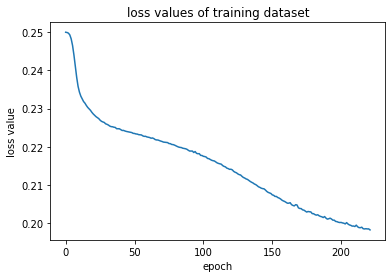

In [216]:
training_loss = MLP.history['loss']
plt.title("loss values of training dataset")
plt.xlabel("epoch")
plt.ylabel("loss value")
plt.plot(training_loss)

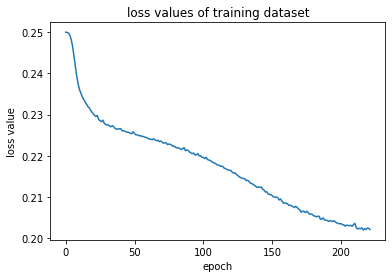

In [217]:
test_loss = MLP.history['val_loss']
plt.title("loss values of training dataset")
plt.xlabel("epoch")
plt.ylabel("loss value")
plt.plot(test_loss)